In [1]:
import os,shutil
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import random


 
mydir = r'C:\\Users\\Jingshi Hu\\Downloads\\project\\Cellari-Deeplearning-Course-master\\Warwick QU Dataset (Released 2016_07_08)'

newdir = os.getcwd()
raw_img_train_location = newdir+os.sep+'train'+os.sep+'raw'
raw_img_testA_location = newdir+os.sep+'testA'+os.sep+'raw'
raw_img_testB_location = newdir+os.sep+'testB'+os.sep+'raw'
anno_img_train_location = newdir+os.sep+'train'+os.sep+'anno'
anno_img_testA_location = newdir+os.sep+'testA'+os.sep+'anno'
anno_img_testB_location = newdir+os.sep+'testB'+os.sep+'anno'

raw_img_train_cropped_location = newdir+os.sep+'train'+os.sep+'cropped'+os.sep+'raw'
raw_img_testA_cropped_location = newdir+os.sep+'testA'+os.sep+'cropped'+os.sep+'raw'
raw_img_testB_cropped_location = newdir+os.sep+'testB'+os.sep+'cropped'+os.sep+'raw'
anno_img_train_cropped_location = newdir+os.sep+'train'+os.sep+'cropped'+os.sep+'anno'
anno_img_testA_cropped_location = newdir+os.sep+'testA'+os.sep+'cropped'+os.sep+'anno'
anno_img_testB_cropped_location = newdir+os.sep+'testB'+os.sep+'cropped'+os.sep+'anno'

if not os.path.isdir(raw_img_train_location):
    os.makedirs(raw_img_train_location)
if not os.path.isdir(raw_img_testA_location):
    os.makedirs(raw_img_testA_location)
if not os.path.isdir(raw_img_testB_location):
    os.makedirs(raw_img_testB_location)

if not os.path.isdir(anno_img_train_location):
    os.makedirs(anno_img_train_location)
if not os.path.isdir(anno_img_testA_location):
    os.makedirs(anno_img_testA_location)
if not os.path.isdir(anno_img_testB_location):
    os.makedirs(anno_img_testB_location)

if not os.path.isdir(raw_img_train_cropped_location):
    os.makedirs(raw_img_train_cropped_location)
if not os.path.isdir(raw_img_testA_cropped_location):
    os.makedirs(raw_img_testA_cropped_location)
if not os.path.isdir(raw_img_testB_cropped_location):
    os.makedirs(raw_img_testB_cropped_location)

if not os.path.isdir(anno_img_train_cropped_location):
    os.makedirs(anno_img_train_cropped_location)
if not os.path.isdir(anno_img_testA_cropped_location):
    os.makedirs(anno_img_testA_cropped_location)
if not os.path.isdir(anno_img_testB_cropped_location):
    os.makedirs(anno_img_testB_cropped_location)

testsetA = []
testsetB = []
trainset = []
testmaskA = []
testmaskB = []
trainmask = []

testsetA2 = []
testsetB2 = []
trainset2 = []
testmaskA2 = []
testmaskB2 = []
trainmask2 = []


pathDir =  os.listdir(mydir)    


for allDir in pathDir:      
    if allDir.startswith('testA')==True and allDir.endswith('anno.bmp')==True:     
        maskA=imread(mydir+"\\"+ allDir)
        testmaskA.append(maskA)
        testmaskA2.append(allDir)
        


    if allDir.startswith('testA')==True and allDir.endswith('anno.bmp')==False:
        testA=imread(mydir+"\\"+allDir)
        
        testsetA.append(testA)
        testsetA2.append(allDir)

    if allDir.startswith('testB')==True and allDir.endswith('anno.bmp')==True:
        maskB=imread(mydir+"\\"+allDir)
        
        testmaskB.append(maskB)
        testmaskB2.append(allDir)

    if allDir.startswith('testB')==True and allDir.endswith('anno.bmp')==False:
        testB=imread(mydir+"\\"+allDir)
        
        testsetB.append(testB)
        testsetB2.append(allDir)

    if allDir.startswith('train')==True and allDir.endswith('anno.bmp')==True:
        mask=imread(mydir+"\\"+allDir)
        
        trainmask.append(mask)
        trainmask2.append(allDir)

    if allDir.startswith('train')==True and allDir.endswith('anno.bmp')==False:
        train=imread(mydir+"\\"+allDir)
 
        trainset.append(train)
        trainset2.append(allDir)


    
def copy_img(path,list):
    ##path:新目录，list：存放图片的表
    for i in range(len(list)):
        new_obj_name = list[i]
        shutil.copy(mydir+'\\'+new_obj_name,path+'\\'+new_obj_name)
 
 
img_list = glob.glob(mydir+os.sep+"*.bmp")



copy_img(raw_img_train_location,trainset2)
copy_img(raw_img_testA_location,testsetA2) 
copy_img(raw_img_testB_location,testsetB2)
copy_img(anno_img_train_location,trainmask2)
copy_img(anno_img_testA_location,testmaskA2)
copy_img(anno_img_testB_location,testmaskB2)


def crop_img(raw_picture,anno_picture,crop_size,path1,path2):
    count =0
    ##raw_picture：raw图片矩阵集合,anno_picture:anno图片矩阵集合，crop_size：切割尺寸,path1:raw存放路径，path2:anno存放路径
    for i in range(len(raw_picture)):
        for j in range(2):
            raw_img = raw_picture[i]
            anno_img = anno_picture[i]
            x_shape = raw_img.shape[0]-crop_size
            y_shape = raw_img.shape[1]-crop_size
            x1 = random.randint(1,int(x_shape/2))
            x2 = random.randint(int(x_shape/2),x_shape)
            y1 = random.randint(1,int(y_shape/2))
            y2 = random.randint(int(y_shape/2),y_shape)
            if j == 0:
                cropped_raw_img = raw_img[x1:x1+crop_size, y1:y1+crop_size]
                cropped_anno_img = anno_img[x1:x1+crop_size, y1:y1+crop_size]
            else:
                cropped_raw_img = raw_img[x2:x2+crop_size, y2:y2+crop_size]
                cropped_anno_img = anno_img[x1:x1+crop_size, y1:y1+crop_size]
            count = count+1
            Image.fromarray(cropped_raw_img).save(path1+os.sep+str(count)+'.png')
            Image.fromarray(cropped_anno_img).save(path2+os.sep+str(count)+'.png')
    
    list1 = os.listdir(path1)
    list2 = os.listdir(path2)
    
    return list1,list2 
    


testsetA_cropped = []    
testsetB_cropped = []  
testmaskA_cropped = []  
testmaskB_cropped = []  
trainset_cropped = []  
trainmask_cropped = []  
[testsetA_cropped,testmaskA_cropped]=crop_img(testsetA,testmaskA,400,raw_img_testA_cropped_location,anno_img_testA_cropped_location)
[testsetB_cropped,testmaskB_cropped]=crop_img(testsetB,testmaskB,400,raw_img_testB_cropped_location,anno_img_testB_cropped_location)
[trainset_cropped,trainmask_cropped]=crop_img(trainset,trainmask,400,raw_img_train_cropped_location,anno_img_train_cropped_location)



             


                    
    







['testA_1.bmp', 'testA_10.bmp', 'testA_11.bmp', 'testA_12.bmp', 'testA_13.bmp', 'testA_14.bmp', 'testA_15.bmp', 'testA_16.bmp', 'testA_17.bmp', 'testA_18.bmp', 'testA_19.bmp', 'testA_2.bmp', 'testA_20.bmp', 'testA_21.bmp', 'testA_22.bmp', 'testA_23.bmp', 'testA_24.bmp', 'testA_25.bmp', 'testA_26.bmp', 'testA_27.bmp', 'testA_28.bmp', 'testA_29.bmp', 'testA_3.bmp', 'testA_30.bmp', 'testA_31.bmp', 'testA_32.bmp', 'testA_33.bmp', 'testA_34.bmp', 'testA_35.bmp', 'testA_36.bmp', 'testA_37.bmp', 'testA_38.bmp', 'testA_39.bmp', 'testA_4.bmp', 'testA_40.bmp', 'testA_41.bmp', 'testA_42.bmp', 'testA_43.bmp', 'testA_44.bmp', 'testA_45.bmp', 'testA_46.bmp', 'testA_47.bmp', 'testA_48.bmp', 'testA_49.bmp', 'testA_5.bmp', 'testA_50.bmp', 'testA_51.bmp', 'testA_52.bmp', 'testA_53.bmp', 'testA_54.bmp', 'testA_55.bmp', 'testA_56.bmp', 'testA_57.bmp', 'testA_58.bmp', 'testA_59.bmp', 'testA_6.bmp', 'testA_60.bmp', 'testA_7.bmp', 'testA_8.bmp', 'testA_9.bmp']
['testA_10_anno.bmp', 'testA_11_anno.bmp', 'test

TypeError: Image data of dtype <U96 cannot be converted to float

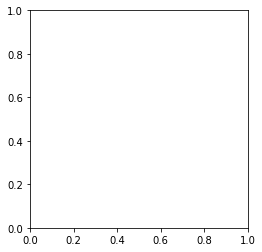

In [7]:
plt.imshow("C:\\Users\\Jingshi Hu\\Downloads\\project\\Cellari-Deeplearning-Course-master\\train\\cropped\\raw\\1.png")


In [ ]:
plt.imshow(anno_img_train_cropped_location+os.sep+'1.png')
